In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measure = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(measure.date).order_by(measure.date.desc()).first()
most_recent_date

('2017-08-23',)

(0.0, 7.0)

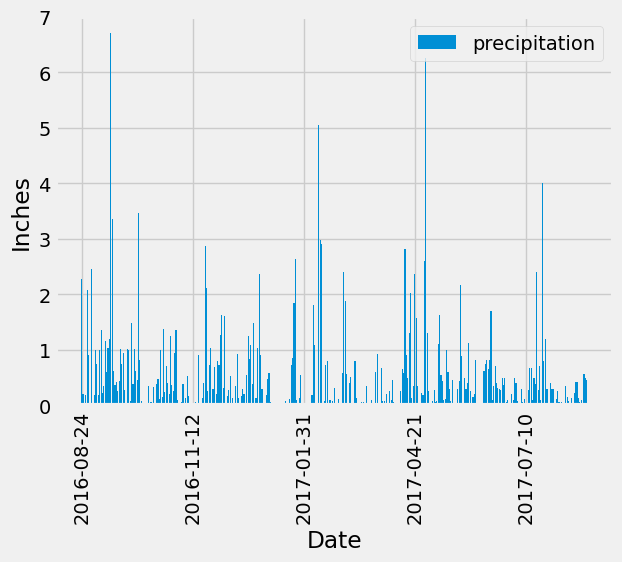

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
first_date = dt.datetime(2017, 8, 23)

# Calculate the date one year from the last date in data set.
last_date = first_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query_dates= session.query(measure.date, measure.prcp).filter(measure.date < first_date).filter(measure.date > last_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precp_dates = pd.DataFrame(query_dates, columns=["Date","Precipitation Level"])

# Sort the dataframe by date
precp_dates = precp_dates.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
x_date = precp_dates['Date']
y_rain = precp_dates['Precipitation Level']

fig, ax = plt.subplots()
prec_bar = ax.bar(x_date, y_rain)
ax.legend(['precipitation'])
plt.xlabel("Date")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.ylim(0, 7)
#plt.tight_layout()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precp_dates.describe()

,Precipitation Level
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(measure.station).group_by(measure.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(measure.station, func.count(measure.station)).group_by(measure.station).order_by(func.count(measure.station)).all()
stations

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = max(stations, key=lambda x: x[1])
most_active = most_active[0]
active_station = session.query(func.min(measure.tobs), func.max(measure.tobs), func.avg(measure.tobs)).filter(measure.station==most_active).all()
print(active_station)

[(54.0, 85.0, 71.66378066378067)]


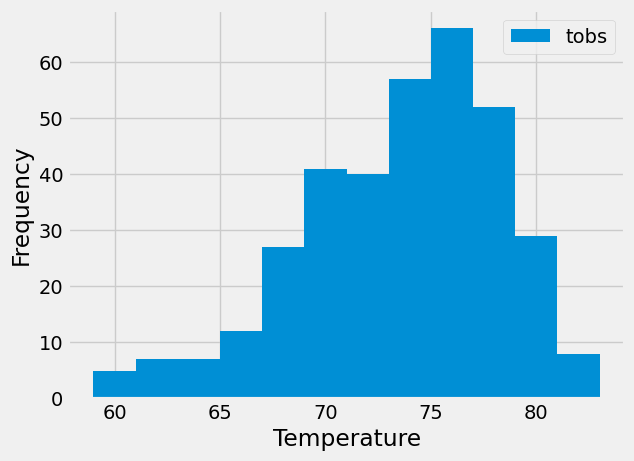

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_temps= session.query(measure.tobs).filter(measure.station==most_active).filter(measure.date < first_date).filter(measure.date > last_date).all()
query_df = pd.DataFrame(query_temps)

plt.hist(query_df, bins=12)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'])

plt.show()

# Close Session

In [38]:
# Close Session
session.close()